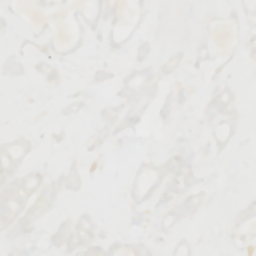

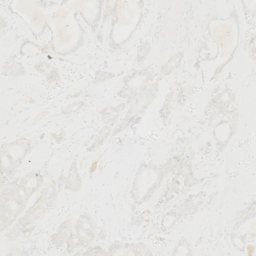

(None, None)

In [2]:
from PIL import Image, ImageFilter

def remove_style(image_path, filter_type='gaussian', radius=2):
    """
    Remove style from an image using frequency-based filtering techniques.

    Args:
    image_path (str): Path to the input image.
    filter_type (str, optional): Type of filter to apply. Options are 'gaussian' or 'median'. Defaults to 'gaussian'.
    radius (int, optional): Radius parameter for the filter. Defaults to 2.

    Returns:
    PIL.Image.Image: Processed image with style removed.
    """
    # Open the image
    img = Image.open(image_path)
    
    # Apply the specified filter
    if filter_type == 'gaussian':
        processed_img = img.filter(ImageFilter.GaussianBlur(radius))
    elif filter_type == 'median':
        processed_img = img.filter(ImageFilter.MedianFilter(radius))
    else:
        raise ValueError("Invalid filter type. Choose 'gaussian' or 'median'.")
    
    return processed_img,img

# Example usage:
input_image_path = 'epoch003_real_B.png'
processed_image,og_image = remove_style(input_image_path, filter_type='median', radius=5)
processed_image.show(), og_image.show()


In [15]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.transforms import transforms
from PIL import Image
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        # Load a pretrained CNN model
        self.cnn = models.vgg19(weights='DEFAULT')
        # Remove the fully connected layers at the end
        self.cnn = nn.Sequential(*list(self.cnn.children())[:-2])

    def forward(self, x):
        # Forward pass through the CNN
        features = self.cnn(x)
        return features

# class ImageReconstructor(nn.Module):
#     def __init__(self, input_size, output_channels=3):
#         super(ImageReconstructor, self).__init__()
#         # Define a decoder network to reconstruct the image
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(input_size, 512, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ReLU(inplace=True),
#             nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ReLU(inplace=True),
#             nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ReLU(inplace=True),
#             nn.ConvTranspose2d(128, output_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.Tanh()  # Output image in range [-1, 1]
#         )

#     def forward(self, x):
#         # Forward pass through the decoder network
#         reconstructed_image = self.decoder(x)
#         return reconstructed_image

# Instantiate the feature extractor
feature_extractor = FeatureExtractor()

# Example input image (3-channel RGB)
to_tensor=transforms.ToTensor()
# input_image = torch.randn(1, 3, 224, 224)
input_image=to_tensor(Image.open("epoch003_real_B.png")).unsqueeze(0)
# Extract semantic features from the input image
semantic_features = feature_extractor(input_image)
print(semantic_features.size())
# Reconstruct the image using semantic features
# Here, we use the number of channels in the semantic features as the input size for the decoder
# input_size = semantic_features.size(1)
# reconstructor = ImageReconstructor(input_size)
# reconstructed_image = reconstructor(semantic_features).squeeze(0)

# # Output the reconstructed image
# import matplotlib.pyplot as plt
# reconstructed_image = torch.clamp(reconstructed_image, 0, 1)
# # Assuming reconstructed_image is the tensor you want to plot
# plt.imshow(reconstructed_image.permute(1, 2, 0).cpu().detach().numpy())
# plt.axis('off')
# plt.title('Reconstructed Image')
# plt.show()


torch.Size([1, 512, 8, 8])


In [14]:
print(torch.min(reconstructed_image), torch.max(reconstructed_image))


tensor(0., grad_fn=<MinBackward1>) tensor(0.1040, grad_fn=<MaxBackward1>)
